## Importing the required libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time



## Reading the dataset into pandas dataframe

In [3]:
data = pd.read_csv('../Data/raw_data.csv',error_bad_lines=False)
data = data[data.columns[0:9]]

In [4]:
data
type(data)

pandas.core.frame.DataFrame

converting the data['CreatedOn'] string objects into datetime objects

In [5]:
data['CreatedOn']=pd.to_datetime(data['CreatedOn'])

### Specifying the reference start time for hour count

In [6]:
init_time= "2018-01-01 00:00:00"
init_time =pd.to_datetime(init_time)

In [7]:
dateafter=pd.Series(int)


### Calculating the hour count from the reference start time and finding mod 24 inorder to find at which hour of the day the query has been recorded

In [8]:
for i in range(0,len(data)):
    tm=data.iloc[i]['CreatedOn']
    time_diff = time.mktime(tm.timetuple()) - time.mktime(init_time.timetuple())
    dateafter.at[i]=(int)(time_diff/(60*60))%24

In [9]:
print(dateafter)

0        20
1        20
2        20
3        19
4        19
         ..
53924    11
53925    11
53926    11
53927    17
53928    19
Length: 53929, dtype: object


### Now copying the obtained data into a new column 

In [10]:
data['Hour of the day']=dateafter

In [11]:
datebefore=pd.Series

In [12]:
datebefore=data['CreatedOn']

### Extracting the month number from the data['CreatedOn'] column objects

In [13]:
for i in range(0,len(data)):
    tm=data.iloc[i]['CreatedOn']
    dateafter.at[i]=tm.month

In [14]:
data['Month']=dateafter

### Now creating a new csv with the modified data.

In [15]:
data.to_csv('../Data/discrete_data.csv', encoding='utf-8-sig', index=False)

In [16]:
data = pd.read_csv('../Data/discrete_data.csv',error_bad_lines=False)

#### Dropping the column 'Season' as most of the entries (about 95%) are zeros(unspecified) which is not helpful for any analysis.

#### Can say this is irrevelant feature since we can't answer any meaningful queries using this column data.

In [17]:
data=data.drop(columns='Season')

#### As some of the rows contain random integer values like Sector : 256 , Category :418 , Crop :10702 which aren't very meaningful. So the below code converts the rows containing integer values into NaN values as we can remove them later easily.

In [18]:
for column in data[['Sector', 'Category','DistrictName','BlockName','Crop', 'QueryType', 'StateName','CreatedOn' ]]:
    cnt=0
    for row in data[column]:
        try:
            int(row)
            data.loc[cnt, column]=np.nan
        except ValueError:
            pass
        cnt+=1

### Finding the number of null values

In [19]:
print (data.isnull().sum())

Sector              731
Category            977
Crop               1326
QueryType          7392
StateName             0
DistrictName          0
BlockName           735
CreatedOn             0
Hour of the day       0
Month                 0
dtype: int64


In [20]:
data=data.dropna()

In [21]:
data.reindex()

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn,Hour of the day,Month
0,HORTICULTURE,Fruits,Mango,Nutrient Management,RAJASTHAN,KOTA,SANGOD,2018-12-31 20:54:08.550,20,12
2,AGRICULTURE,Others,Others,Weather,UTTARAKHAND,HARIDWAR,BAHADRABAD,2018-12-31 20:02:26.907,20,12
3,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,WEST BENGAL,HOOGHLY,ARAMBAGH,2018-12-31 19:54:59.980,19,12
4,AGRICULTURE,Others,Others,Weather,RAJASTHAN,KOTA,SULTANPUR,2018-12-31 19:26:24.730,19,12
5,AGRICULTURE,Others,Others,Weather,CHHATTISGARH,RAIPUR,ARANG,2018-12-31 19:01:28.133,19,12
...,...,...,...,...,...,...,...,...,...,...
53924,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31 11:12:04.123,11,8
53925,AGRICULTURE,Others,Others,Weather,UTTAR PRADESH,KAUSHAMBI,NEVADA,2018-08-31 11:24:04.767,11,8
53926,AGRICULTURE,Others,Others,Government Schemes,UTTAR PRADESH,KAUSHAMBI,NEVADA,2018-08-31 11:31:08.857,11,8
53927,HORTICULTURE,Vegetables,Bitter Gourd,Plant Protection,UTTAR PRADESH,KAUSHAMBI,SIRATHU,2018-08-31 17:04:26.923,17,8


In [22]:
data=data.reset_index()

In [23]:
data=data.drop(columns='index')

In [24]:
data.groupby('StateName').size()

StateName
CHHATTISGARH      3294
GUJARAT           5150
RAJASTHAN         7214
TELANGANA        13309
UTTAR PRADESH     7128
UTTARAKHAND       3980
WEST BENGAL       5417
dtype: int64

### Initial distribution of queries over states

Text(0, 0.5, 'No_of_queries')

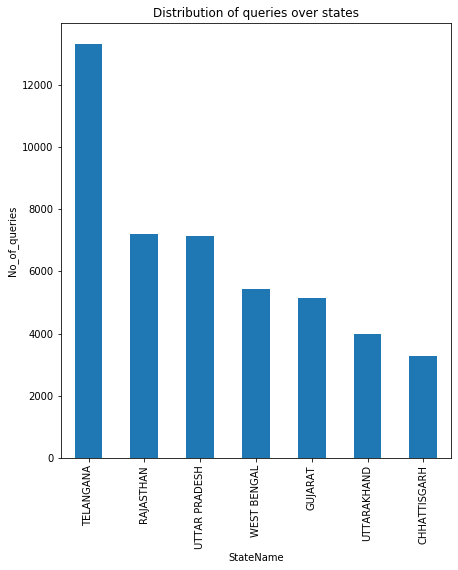

In [25]:
ax = data['StateName'].value_counts().plot(kind='bar',figsize=(7,8),title="Distribution of queries over states")
ax.set_xlabel("StateName")
ax.set_ylabel("No_of_queries")

#### As we can observe that the entries of Telangana are more when compared to others.
#### So first applying sampling methods to TELANGANA State

In [26]:
data_tel = data[data.StateName == "TELANGANA"]

#### Extracted the rows where the StateName is Telangana

In [27]:
data_tel

,Sector,Category,Crop,QueryType,StateName,DistrictName,BlockName,CreatedOn,Hour of the day,Month
8,AGRICULTURE,Others,Others,Weather,TELANGANA,MAHABOOBNAGAR,ITIKYAL,2018-12-31 18:27:52.657,18,12
9,AGRICULTURE,Others,Others,Weather,TELANGANA,MAHABOOBNAGAR,NARAYANPET,2018-12-31 18:13:27.340,18,12
23,AGRICULTURE,Cereals,Paddy (Dhan),Nutrient Management,TELANGANA,NALGONDA,PEDDA ADISERLA PALLY,2018-12-31 16:53:11.690,16,12
26,AGRICULTURE,Others,Others,Government Schemes,TELANGANA,MAHABOOBNAGAR,NARAYANPET,2018-12-31 16:39:11.243,16,12
27,AGRICULTURE,Others,Others,Weather,TELANGANA,MAHABOOBNAGAR,NARAYANPET,2018-12-31 16:38:52.507,16,12
...,...,...,...,...,...,...,...,...,...,...
42321,AGRICULTURE,Oilseeds,Groundnut (pea nut/mung phalli),Weed Management,TELANGANA,MEDAK,CHINNAKODUR,2018-02-01 08:19:16.213,8,2
42322,AGRICULTURE,Cereals,Paddy (Dhan),\tPlant Protection\t,TELANGANA,NALGONDA,NIDAMANOOR,2018-02-01 08:05:36.970,8,2
42323,AGRICULTURE,Cereals,Paddy (Dhan),Nutrient Management,TELANGANA,WARANGAL,KOTHAGUDEM,2018-02-01 08:03:05.350,8,2
42324,AGRICULTURE,Others,Others,Government Schemes,TELANGANA,KARIMNAGAR,BHEEMDEVARAPALLI,2018-02-01 07:52:28.803,7,2


#### Making a sample of 7500 with sampling without replacement technique

In [28]:
#data sampling code goes here.
data_tel_sample = data_tel.sample(7500,replace="False")

#### Now extract all the rows where the statename is not Telangana from the initial sample and appending it to the sampled data of state Telangana

In [29]:
data_without_tel = data[data.StateName != "TELANGANA"]

In [30]:
result = pd.concat([data_without_tel,data_tel_sample])

### Plotting a graph so that we can compare the patterns before and after sampling
### The graph w.r.t StateName before Sampling

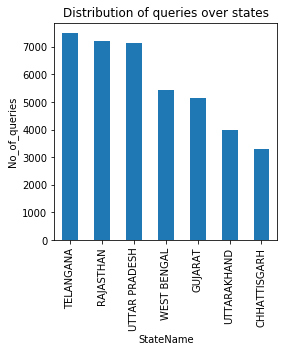

In [31]:
ax = result['StateName'].value_counts().plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("StateName")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/statename_before_sample.png')

### Now sampling the whole dataset

In [32]:
data_sam = result.sample(21000,replace = "False")
#fig = plt.figure()

### The graph w.r.t StateName after sampling

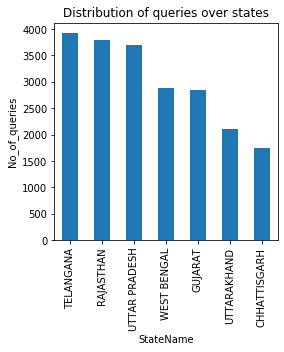

In [33]:
ax = data_sam['StateName'].value_counts().plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("StateName")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/statename_after_sample.png')

### Graph w.r.t Hour of the day before sampling

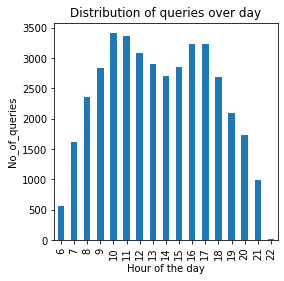

In [34]:
ax = result.groupby('Hour of the day').size().plot(kind='bar',figsize=(4,4),title="Distribution of queries over day")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/hour_before_sample.png')

### Graph w.r.t Hour of the day after sampling

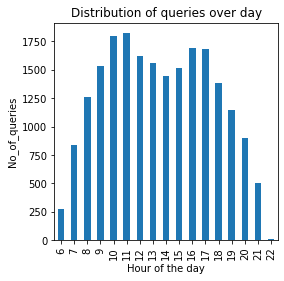

In [35]:
ax = data_sam.groupby('Hour of the day').size().plot(kind='bar',figsize=(4,4),title="Distribution of queries over day")
ax.set_xlabel("Hour of the day")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/hour_after_sample.png')

#### As the patterns before and after sampling didn't change , we can say that this sampling technique worked out well.

In [36]:
data_sam.to_csv('../Data/dicrete_clean_sample_data.csv', encoding='utf-8-sig', index=False)

In [37]:
data = pd.read_csv('../Data/dicrete_clean_sample_data.csv',error_bad_lines=False)

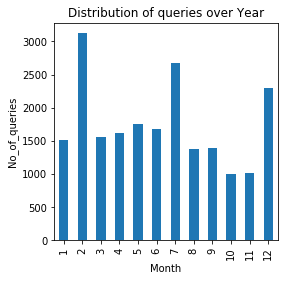

In [38]:
ax = data_sam.groupby('Month').size().plot(kind='bar',figsize=(4,4),title="Distribution of queries over Year")
ax.set_xlabel("Month")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/month_queries.png')

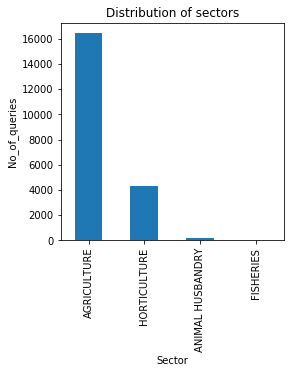

In [39]:
ax = data_sam['Sector'].value_counts().plot(kind='bar',figsize=(4,4),title="Distribution of sectors")
ax.set_xlabel("Sector")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/sector_queries.png')

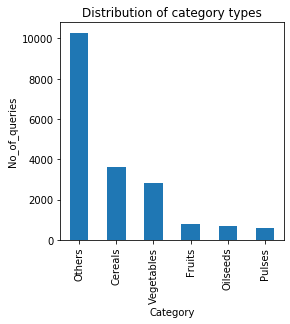

In [40]:
ax = data_sam['Category'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of category types")
ax.set_xlabel("Category")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/category_queries.png')

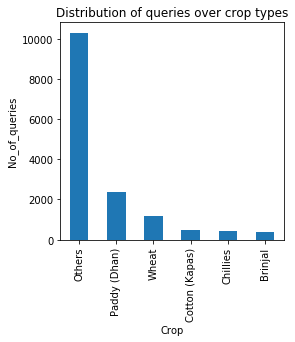

In [41]:
ax = data_sam['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over crop types")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/crop_queries.png')

C:\Users\A Busy Jet\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\A Busy Jet\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


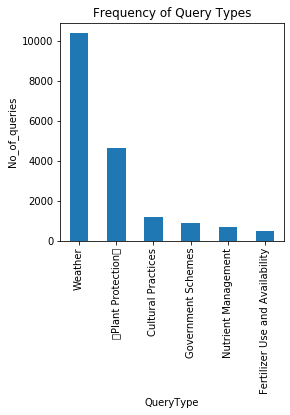

In [42]:
ax = data_sam['QueryType'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Frequency of Query Types")
ax.set_xlabel("QueryType")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/querytype_queries.png')

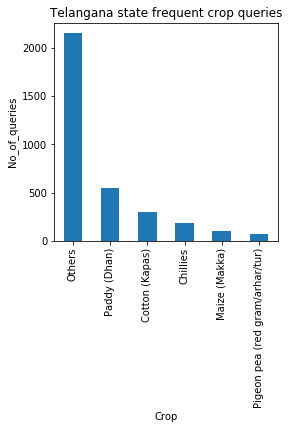

In [43]:
data_tel = data[data.StateName == "TELANGANA"]
ax = data_tel['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Telangana state frequent crop queries")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/tel_crops.png')

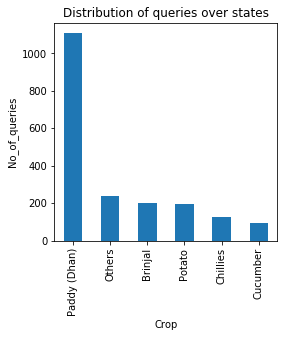

In [44]:
data_west = data[data.StateName == "WEST BENGAL"]
ax = data_west['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/west_bengal_crops.png')

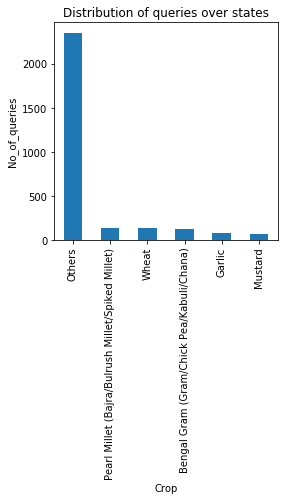

In [45]:
data_raja = data[data.StateName == "RAJASTHAN"]
ax = data_raja['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/rajasthan_Crops.png')

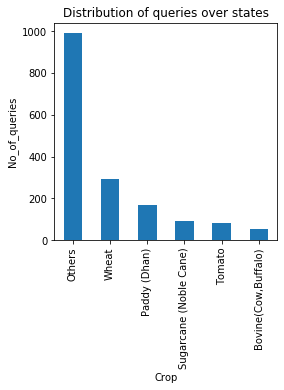

In [46]:
data_uttar = data[data.StateName == "UTTARAKHAND"]
ax = data_uttar['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/uttarakhand_crops.png')

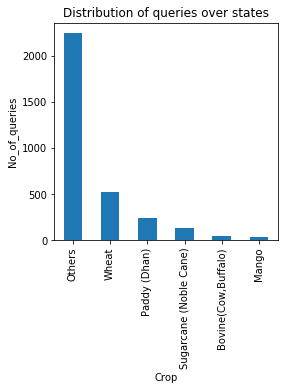

In [47]:
data_up = data[data.StateName == "UTTAR PRADESH"]
ax = data_up['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/uttar_pradesh_crops.png')

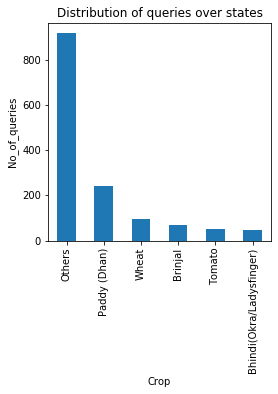

In [48]:
data_chat = data[data.StateName == "CHHATTISGARH"]
ax = data_chat['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/chhattisgarh_crops.png')

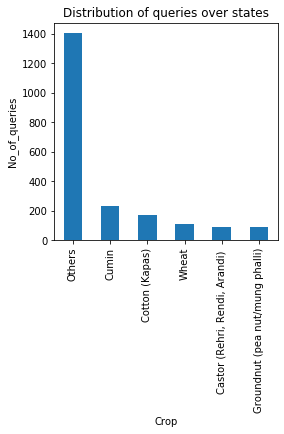

In [49]:
data_guj = data[data.StateName == "GUJARAT"]
ax = data_guj['Crop'].value_counts().sort_values(ascending=False).head(6).plot(kind='bar',figsize=(4,4),title="Distribution of queries over states")
ax.set_xlabel("Crop")
ax.set_ylabel("No_of_queries")
plt.savefig('../Plots/gujarat_crops.png')